### Importações e Tratamento inicial dos dados

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

data = pd.read_csv('anime-dataset-2023.csv')

### Quais gêneros são mais e menos encontrados entre os animes?

#### Resposta encontrada:
-  Mais comuns: Comédia, Fantasia e Ação
-  Menos comuns: Gourmet, Yuri e Erotico

,Genre,Qtd
9,Comedy,7142
7,Fantasy,5306
0,Action,4730
3,Adventure,3842
2,Sci-Fi,3091
4,Drama,2836
10,Romance,2063
11,Slice of Life,1755
6,Supernatural,1494
19,Hentai,1486


<Axes: xlabel='Genre'>

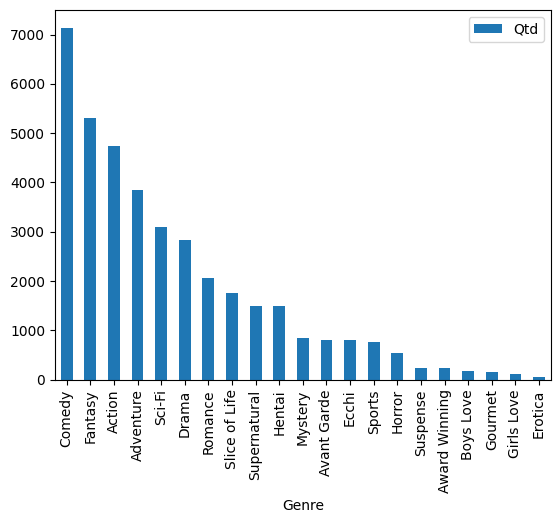

In [3]:
data_genres = data.loc[data['Genres'] != 'UNKNOWN']
anime_genres = data_genres['Genres'].values
dic = {}  

for genre in anime_genres:

    for each_one in genre.split(','):
        each_one = each_one.strip() 
        if not each_one in dic:
            dic[each_one] = 1
        else:
            dic[each_one] += 1



df = pd.DataFrame(list(dic.items()), columns=['Genre', 'Qtd'])

df = df.sort_values(by='Qtd', ascending=False)
display(df)
df.plot(kind='bar', x='Genre')


### Quais são as estatísticas dos scores dos animes?

#### Interpretações:

Baseando-se nas estatísticas apresentadas, é notável que, na maioria dos casos, as pontuações não são muito altas. A análise da média, mediana e moda revela que as pontuações flutuam principalmente entre 6 e 6,5. Este fato é reforçado pelo desvio padrão ser menor do que 1 e pelo histograma mostrar a maior concentração de notas dentro dessa faixa.

O histograma também indica que há poucas notas que se afastam significativamente do valor de 6. No entanto, observa-se que há mais casos de notas mais altas do que mais baixas. Os valores mínimo e máximo mostram que há animes que se destacam da maioria, embora nenhum tenha recebido uma pontuação mínima de 0, que indicaria um completo desprezo, ou uma pontuação máxima de 10, que mostraria uma aceitação universal.

A conclusão a partir desses dados sugere que os otakus podem ser críticos severos em suas avaliações. Eles tendem a atribuir notas mais baixas, mas a maioria das avaliações se concentra em torno de uma nota de 6.

,Statistics,Value
0,Mean,6.38089
1,Median,6.39
2,Mode,"[6.31, 6.54]"
3,Minimum,1.85
4,Maximum,9.1
5,Standard deviation,0.928696


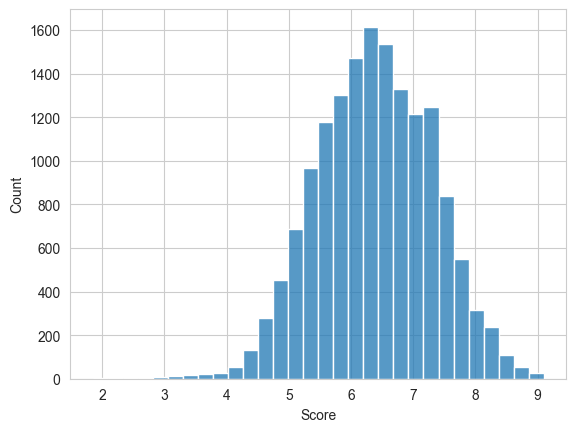

In [4]:
data_scores = data.loc[data['Score'] != 'UNKNOWN']
scores = data_scores['Score']
scores = scores.astype(float)

mean = scores.mean()
median = scores.median()
mode = scores.mode().values
minimum = scores.min()
maximum = scores.max()
std = scores.std()

statistics = {'Statistics': ['Mean', 'Median', 'Mode', 'Minimum', 'Maximum', 'Standard deviation'], 'Value': [mean, median, mode, minimum, maximum, std]}

df = pd.DataFrame(statistics)
display(df)

sns.set_style("whitegrid")
sns.histplot(scores, bins=30)
plt.show()  


### Quais são os animes que se encontram nos dois extremos de score?

#### Resposta encontrada:

-  O anime com o maior score: Fullmetal Alchemist: Brotherhood	
-  O anime com o menor score: Tenkuu Danzai Skelter+Heaven

In [5]:
data_scores = data.loc[data['Score'] != 'UNKNOWN']

scores = data_scores[['Name', 'Score']]

maximum = scores['Score'].max()
minimum = scores['Score'].min()

best_anime = scores.loc[scores['Score'] == maximum]
worst_anime = scores.loc[scores['Score'] == minimum]

display(best_anime, worst_anime)

,Name,Score
3961,Fullmetal Alchemist: Brotherhood,9.1


,Name,Score
2925,Tenkuu Danzai Skelter+Heaven,1.85


### Existe alguma correlação entre o número de episódios e a popularidade de um anime?

#### Interpretações:

Analisando o valor-p obtido, podemos rejeitar a hipótese nula de que não há nenhuma correlação entre a quantidade de episódios e a popularidade de um anime. No entanto, o coeficiente de Pearson, embora positivo, apresenta um valor relativamente baixo (0,153). Isso indica que, embora exista uma certa tendência de que animes com mais episódios tenham maior popularidade, essa relação não é um fator determinante.

A correlação positiva encontrada é moderada. Portanto, outros fatores, como a qualidade da história, a animação, os personagens, o marketing e a base de fãs, provavelmente têm uma influência muito mais significativa na popularidade dos animes do que a quantidade de episódios.

In [12]:
data_popularity = data.query("Episodes != 'UNKNOWN' and Popularity != 'UNKNOWN' and Type != 'Music' and Type != 'Movie' ")

popularity = data_popularity[['Episodes', 'Popularity']].copy()
popularity['Episodes'] = pd.to_numeric(popularity['Episodes'], errors='coerce')
popularity['Popularity'] = pd.to_numeric(popularity['Popularity'], errors='coerce')

correlation, p_value = pearsonr(popularity['Episodes'], popularity['Popularity'])


pearson = {'Statistics': ['Correlation', 'P_Value'], 'Value': [correlation, p_value]}
df_pearson = pd.DataFrame(pearson)
display(df_pearson)

,Statistics,Value
0,Correlation,1.532442e-01
1,P_Value,4.255708e-91
